# *ELECTRIC VEHICLE ADOPTION ANALYSIS- WASHINGTON*

# Importing neccessary Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

# Loading the dataset

In [7]:
df = pd.read_csv(r"C:\Users\Munaa\OneDrive\Desktop\Electronic Vehicle Analysis\data\Electric_Vehicle_Population_Data.csv")

In [11]:
df.info

<bound method DataFrame.info of         VIN (1-10)    County            City State  Postal Code  Model Year  \
0       WAUTPBFF4H      King         Seattle    WA      98126.0        2017   
1       WAUUPBFF2J  Thurston         Olympia    WA      98502.0        2018   
2       5YJSA1E22H  Thurston           Lacey    WA      98516.0        2017   
3       1C4JJXP62M  Thurston          Tenino    WA      98589.0        2021   
4       5YJ3E1EC9L    Yakima          Yakima    WA      98902.0        2020   
...            ...       ...             ...   ...          ...         ...   
181453  50EA1TEA7P   Douglas  East Wenatchee    WA      98802.0        2023   
181454  1C4JJXP60N   Spokane  Spokane Valley    WA      99206.0        2022   
181455  5YJ3E1EA0M      King        Enumclaw    WA      98022.0        2021   
181456  5YJ3E1EC8L     Clark       Vancouver    WA      98682.0        2020   
181457  5YJSA1E27F   Whatcom      Bellingham    WA      98225.0        2015   

         Make     M

### DATA CLEANING 

### Checking for null values

In [12]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

### Handling missing values

In [ ]:

cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].apply(lambda col: col.fillna(col.median()))

print(df.isnull().sum())


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


### Checking for duplicate values

In [14]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


### Printing the columns

In [15]:
print(df.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


### Converting the columns to lower case

In [16]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
print(df.columns)


Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')


In [17]:
df.dtypes

vin_(1-10)                                            object
county                                                object
city                                                  object
state                                                 object
postal_code                                          float64
model_year                                             int64
make                                                  object
model                                                 object
electric_vehicle_type                                 object
clean_alternative_fuel_vehicle_(cafv)_eligibility     object
electric_range                                         int64
base_msrp                                              int64
legislative_district                                 float64
dol_vehicle_id                                         int64
vehicle_location                                      object
electric_utility                                      object
2020_census_tract       

### Saving the cleaned dataset 

In [18]:

df.to_csv(r"C:\Users\Munaa\OneDrive\Desktop\Electronic Vehicle Analysis\data\cleaned_ev_data.csv", index=False)


### Loading the cleaned dataset

In [19]:
df_cleaned = pd.read_csv(r"C:\Users\Munaa\OneDrive\Desktop\Electronic Vehicle Analysis\data\cleaned_ev_data.csv")

In [20]:
print(df.columns)

Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')


In [21]:
df.head()

,vin_(1-10),county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10


# EDA AND VISUALIZATIONS

### 1. MARKET TRENDS & ADOPTION PATTERNS

a)	Total number of electric vehicles (EVs) registered in Washington State

In [22]:

total_evs = df.shape[0]
print(f"Total number of EVs registered: {total_evs}")


Total number of EVs registered: 181458


b)	EV adoption  over the years 

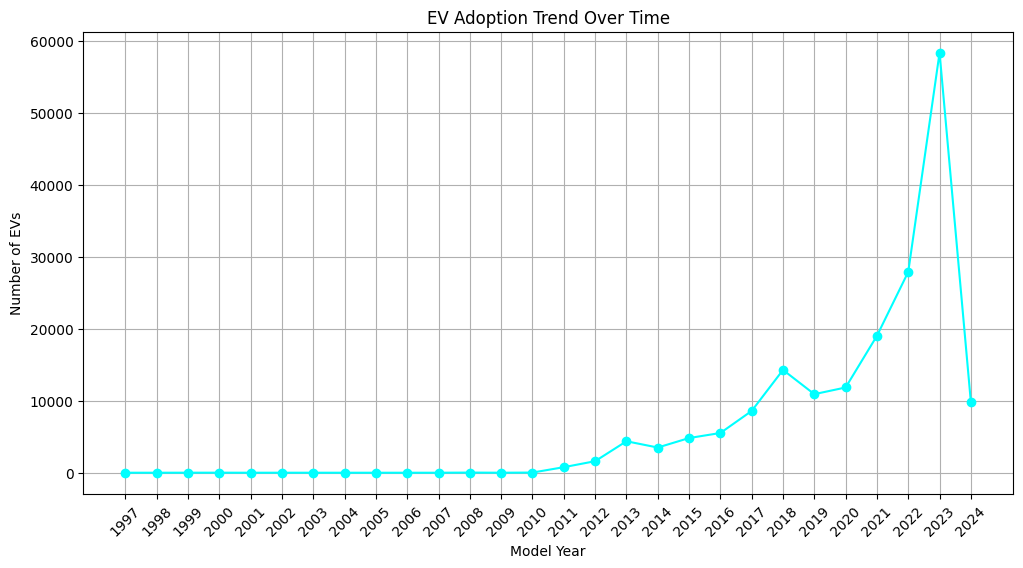

In [ ]:


# Count EVs per year
yearly_counts = df['model_year'].value_counts().sort_index()

# Define full year range (1997–2024)
years = pd.Index(range(1997, 2025))
yearly_counts = yearly_counts.reindex(years, fill_value=0)

# Line chart
plt.figure(figsize=(12,6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='cyan')

# Labels and formatting
plt.title("EV Adoption Trend Over Time")
plt.xlabel("Model Year")
plt.ylabel("Number of EVs")
plt.grid(True)

# Show every year
plt.xticks(years, rotation=45)

plt.show()


c)	Most popular EV brands and models

Top 10 EV brands:
 make
TESLA         80819
NISSAN        14037
CHEVROLET     13864
FORD           9527
BMW            7680
KIA            7642
TOYOTA         6519
VOLKSWAGEN     5163
JEEP           4690
HYUNDAI        4561
Name: count, dtype: int64

Top 10 EV models:
 model
MODEL Y           37007
MODEL 3           30150
LEAF              13356
MODEL S            7731
BOLT EV            6935
MODEL X            5883
VOLT               4798
ID.4               4091
WRANGLER           3543
MUSTANG MACH-E     3487
Name: count, dtype: int64


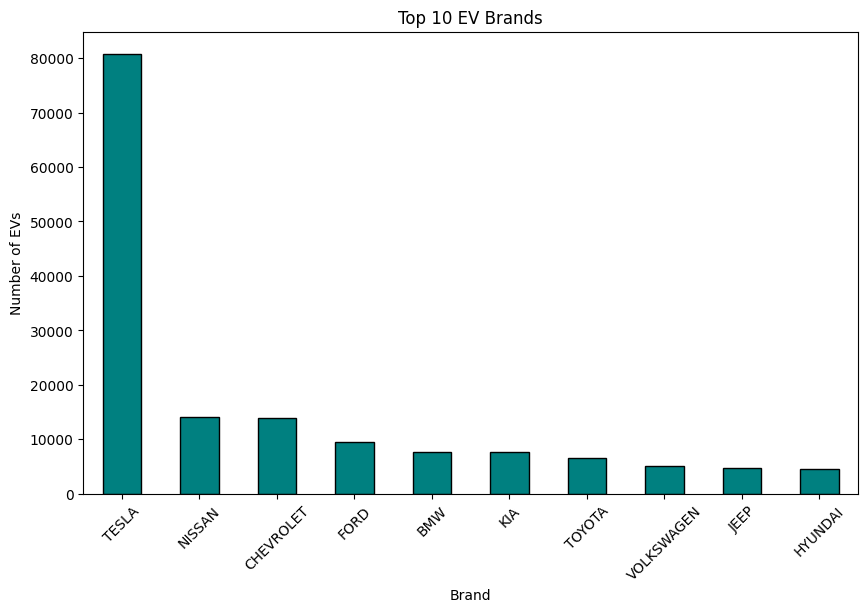

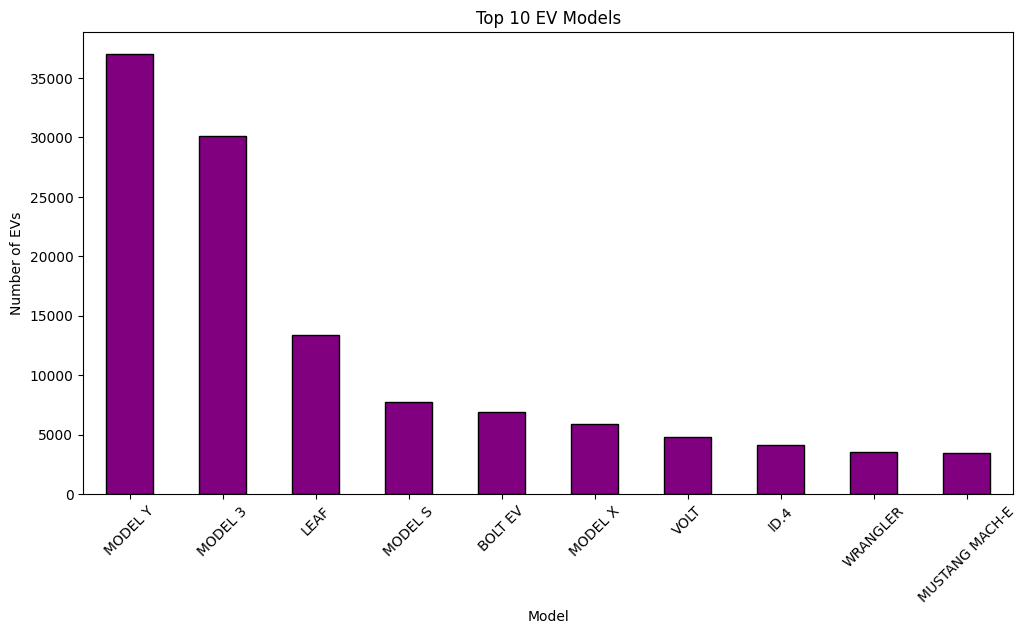

In [44]:


# Top 10 brands
top_brands = df['make'].value_counts().head(10)

# Top 10 models
top_models = df['model'].value_counts().head(10)

print("Top 10 EV brands:\n", top_brands)
print("\nTop 10 EV models:\n", top_models)

# Plot Top 10 Brands
plt.figure(figsize=(10,6))
top_brands.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Top 10 EV Brands")
plt.xlabel("Brand")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.show()

# Plot Top 10 Models
plt.figure(figsize=(12,6))
top_models.plot(kind='bar', color='purple', edgecolor='black')
plt.title("Top 10 EV Models")
plt.xlabel("Model")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.show()



d)  Distribution of Electric Vehicle Types

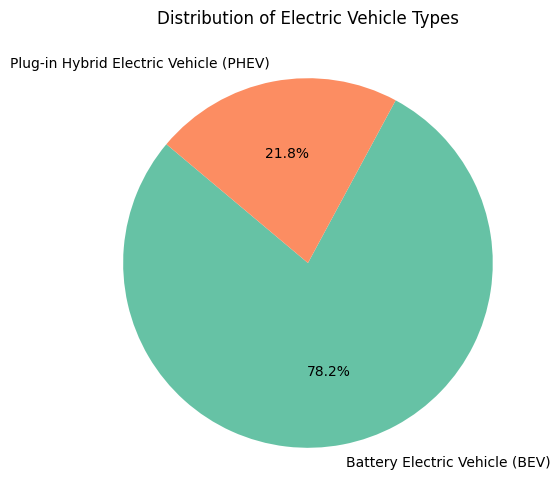

In [26]:


# Count values of electric vehicle type
ev_type_counts = df["electric_vehicle_type"].value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    ev_type_counts,
    labels=ev_type_counts.index,       
    autopct='%1.1f%%',                
    startangle=140,                   
    colors=plt.cm.Set2.colors         
)
plt.title("Distribution of Electric Vehicle Types")
plt.show()


### 2. VEHICLE PERFORMANCE AND RANGE ANALYSIS

a)   Average electric range of EVs

In [27]:
avg_range = df["electric_range"].mean()
print(f"Average EV range: {avg_range:.2f} miles")


Average EV range: 57.83 miles


b)   Models offering the longest and shortest electric ranges?

In [28]:
longest_range = df[['model', 'electric_range']].sort_values(by='electric_range', ascending=False).head(5)
shortest_range = df[['model', 'electric_range']].sort_values(by='electric_range').head(5)

print("Longest range models:\n", longest_range)
print("\nShortest range models:\n", shortest_range)


Longest range models:
           model  electric_range
163898  MODEL S             337
2321    MODEL S             337
174802  MODEL S             337
160280  MODEL S             337
77907   MODEL S             337

Shortest range models:
           model  electric_range
181418  MODEL Y               0
50      MODEL Y               0
155226    ARIYA               0
116309  MODEL Y               0
116306  MODEL Y               0


### 3. INFRASTRUCTURE AND CHARGING NEEDS

a)   Variation in charging requirements 

In [29]:

df['clean_alternative_fuel_vehicle_(cafv)_eligibility'].value_counts()


clean_alternative_fuel_vehicle_(cafv)_eligibility
Eligibility unknown as battery range has not been researched    94730
Clean Alternative Fuel Vehicle Eligible                         66816
Not eligible due to low battery range                           19912
Name: count, dtype: int64

b) Distribution of charging types

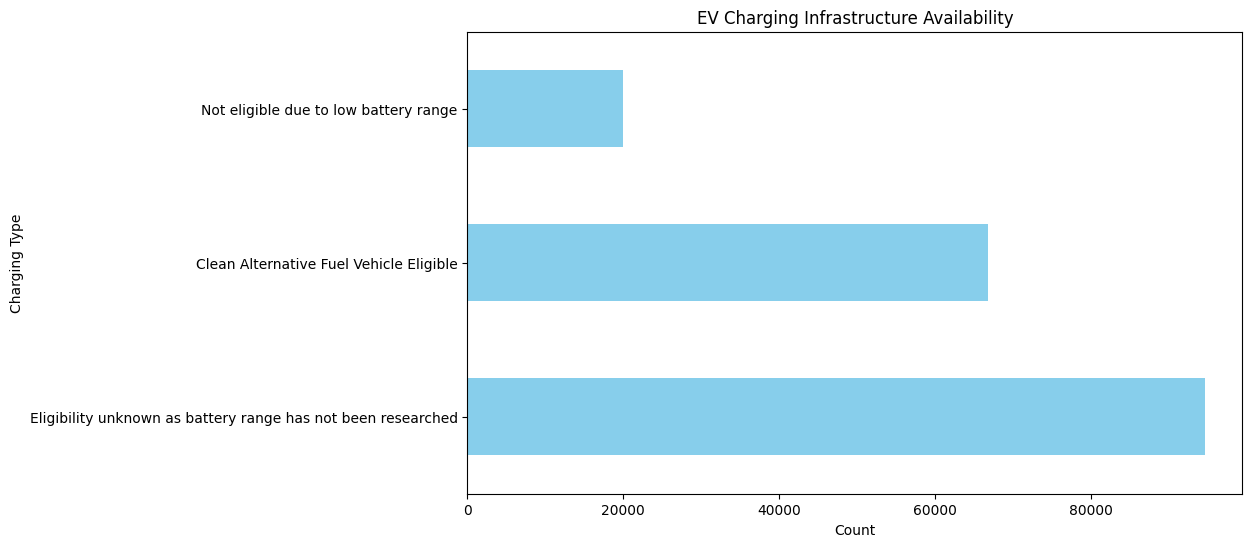

In [49]:
plt.figure(figsize=(10, 6))
df['clean_alternative_fuel_vehicle_(cafv)_eligibility'].value_counts().plot(kind='barh', color='skyblue')

plt.title("EV Charging Infrastructure Availability")
plt.xlabel("Count")
plt.ylabel("Charging Type")

plt.show()


c) Brands with Fast Charging Capability

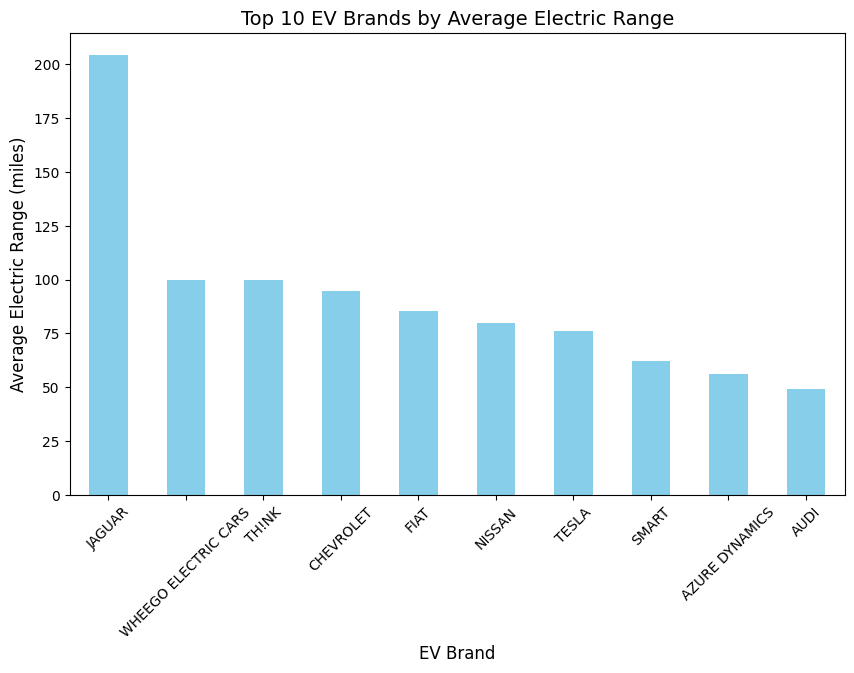

In [31]:


# Grouping  by make and computing  the mean electric range
avg_range = df.groupby("make")["electric_range"].mean().sort_values(ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10,6))
avg_range.plot(kind="bar", color="skyblue")

plt.title("Top 10 EV Brands by Average Electric Range", fontsize=14)
plt.xlabel("EV Brand", fontsize=12)
plt.ylabel("Average Electric Range (miles)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


### 4. Regional distribution and ownership insights 

a)   Top Counties by EV Count

county
King         94463
Snohomish    21439
Pierce       14043
Clark        10675
Thurston      6600
Kitsap        5956
Spokane       4671
Whatcom       4331
Benton        2183
Skagit        1968
Name: count, dtype: int64


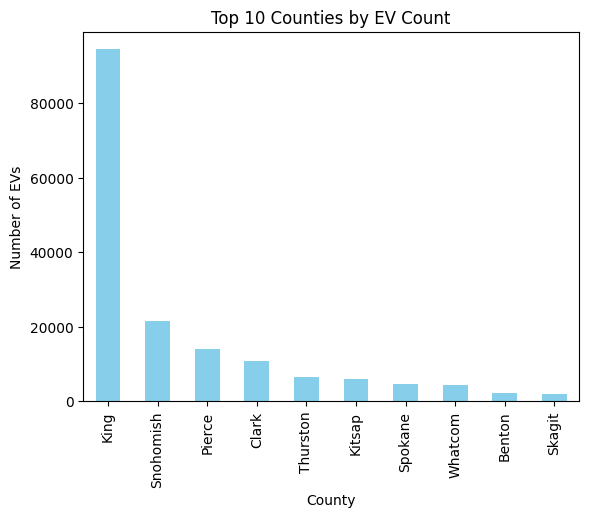

In [32]:
county_counts = df['county'].value_counts().head(10)
print(county_counts)

#  Bar chart
import matplotlib.pyplot as plt

county_counts.plot(kind='bar', title='Top 10 Counties by EV Count', ylabel='Number of EVs', xlabel='County', color='skyblue')
plt.show()


b)   Top cities by EV count

city
Seattle      30048
Bellevue      9117
Redmond       6568
Vancouver     6329
Bothell       5961
Kirkland      5465
Sammamish     5350
Renton        5104
Olympia       4397
Tacoma        3792
Name: count, dtype: int64


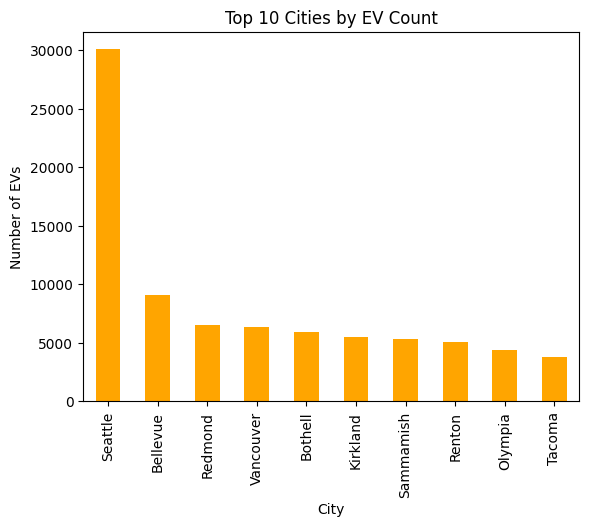

In [34]:
city_counts = df['city'].value_counts().head(10)
print(city_counts)

city_counts.plot(kind='bar', title='Top 10 Cities by EV Count', ylabel='Number of EVs', xlabel='City', color='orange')
plt.show()


### 5. Consumer preferences and market competition

a) Top Manufacturers by EV Count

make
TESLA         80819
NISSAN        14037
CHEVROLET     13864
FORD           9527
BMW            7680
KIA            7642
TOYOTA         6519
VOLKSWAGEN     5163
JEEP           4690
HYUNDAI        4561
Name: count, dtype: int64


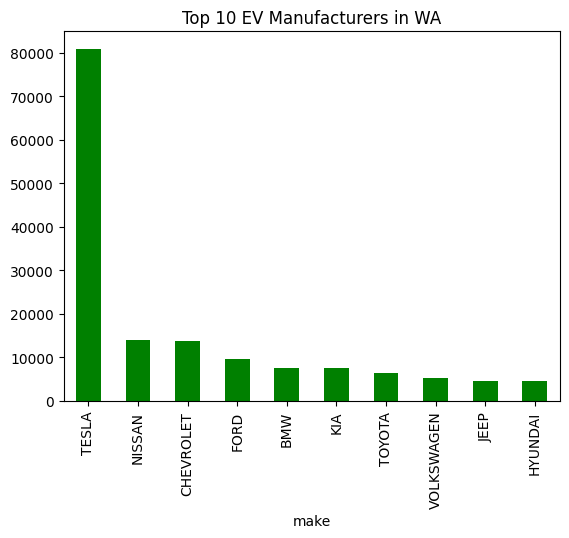

In [35]:
make_counts = df['make'].value_counts().head(10)
print(make_counts)

make_counts.plot(kind='bar', title='Top 10 EV Manufacturers in WA', color='green')
plt.show()


b) EV price trends over the years

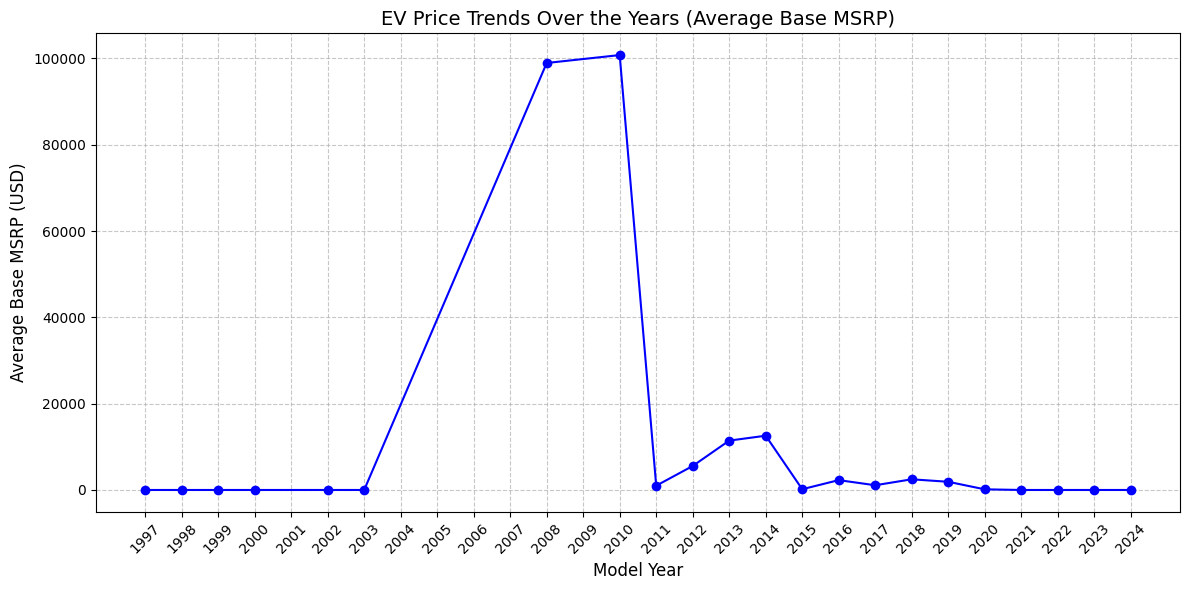

In [ ]:


# Grouping data by model year and calculating average price
price_trends = df.groupby("model_year")["base_msrp"].mean().reset_index()

# Line chart
plt.figure(figsize=(12,6))
plt.plot(price_trends["model_year"], price_trends["base_msrp"], marker="o", linestyle="-", color="blue")

# Labels and title
plt.title("EV Price Trends Over the Years (Average Base MSRP)", fontsize=14)
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Average Base MSRP (USD)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# Show all years
years = np.arange(price_trends["model_year"].min(), price_trends["model_year"].max() + 1)
plt.xticks(years, rotation=45)

plt.tight_layout()
plt.show()


### 6. Future projections and adoption forecasting

 Building a simple linear forecast for EV population

c:\Users\Munaa\OneDrive\Desktop\Electronic Vehicle Analysis\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


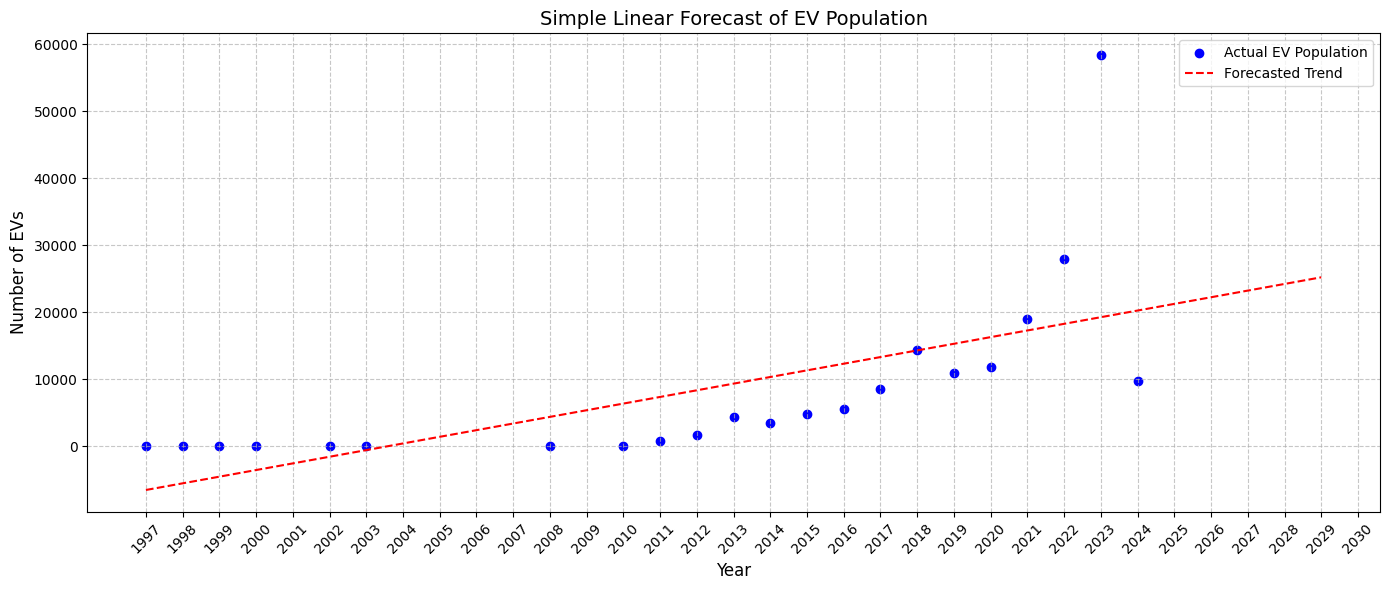

In [56]:

from sklearn.linear_model import LinearRegression

# Group data by year and count EVs
ev_pop = df.groupby("model_year").size().reset_index(name="num_evs")

# axis x and y
X = ev_pop[["model_year"]]   
y = ev_pop["num_evs"]        

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Make predictions
future_years = np.arange(ev_pop["model_year"].min(), 2030).reshape(-1,1)
predictions = model.predict(future_years)

# Plot
plt.figure(figsize=(14,6))   
plt.scatter(ev_pop["model_year"], ev_pop["num_evs"], color="blue", label="Actual EV Population")
plt.plot(future_years, predictions, color="red", linestyle="--", label="Forecasted Trend")

plt.title("Simple Linear Forecast of EV Population", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of EVs", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Show every year on x axis
years = np.arange(ev_pop["model_year"].min(), 2031)
plt.xticks(years, rotation=45)

plt.tight_layout()
plt.show()
